In [27]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [28]:
df = pd.read_csv('cleaned_salary_data.csv')

In [29]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,company_txt,job_state,same_state,age,python,java,r,spark,aws,excel
0,Software Developer,$48K-$92K\n(Glassdoor est.),ImageSoft is a growing company centered around...,4.7,ImageSoft Inc\n4.7,"Southfield, MI",-1,51 to 200 Employees,1996,Company - Private,...,ImageSoft Inc\n,MI,0,24,0,0,0,0,0,0
1,Software Developer,$67K-$125K\n(Glassdoor est.),Job Description\n\nCACIs Business and Informat...,3.6,CACI International Inc\n3.6,"Fairfax, VA",-1,10000+ Employees,1962,Company - Public,...,CACI International Inc\n,VA,0,58,0,1,0,0,0,1
2,Software Developer (Loan Origination),$35K-$67K\n(Glassdoor est.),Software Developers are responsible for the an...,3.6,"Aqua Finance, Inc.\n3.6","Wausau, WI",-1,201 to 500 Employees,1985,Company - Private,...,"Aqua Finance, Inc.\n",WI,0,35,0,0,0,0,0,1
3,Engineering Software Developer,$38K-$82K\n(Glassdoor est.),PURPOSE OF POSITION: To assist in the software...,3.1,"GIW Industries, Inc\n3.1","Grovetown, GA",-1,201 to 500 Employees,1891,Subsidiary or Business Segment,...,"GIW Industries, Inc\n",GA,0,129,0,0,0,0,0,0
4,Full Stack Developer (core .net focused),$49K-$90K\n(Glassdoor est.),Overview\n\n\nDatascan is a provider of wholes...,3.2,"DataScan Technologies, LLC\n3.2","Alpharetta, GA",-1,201 to 500 Employees,-1,Company - Private,...,"DataScan Technologies, LLC\n",GA,0,-1,0,1,0,0,1,1


In [30]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python', 'java', 'r',
       'spark', 'aws', 'excel'],
      dtype='object')

In [31]:
def simple_title(title):
    if 'software developer' in title.lower():
        return 'software developer'
    elif 'software engineer' in title.lower():
        return 'software engineer'
    elif 'software architect' in title.lower():
        return 'software architect'
    elif 'web developer' in title.lower():
        return 'web developer'
    elif 'devops engineer' in title.lower():
        return 'devops engineer'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [32]:
# Group by job title
df['job_title_simple'] = df['Job Title'].apply(simple_title)
df.job_title_simple.value_counts()

software engineer     330
na                    191
software developer    146
web developer          27
devops engineer        15
manager                 1
Name: job_title_simple, dtype: int64

In [33]:
# Group by job seniority
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        470
senior    237
jr          3
Name: seniority, dtype: int64

In [34]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,same_state,age,python,java,r,spark,aws,excel,job_title_simple,seniority
0,Software Developer,$48K-$92K\n(Glassdoor est.),ImageSoft is a growing company centered around...,4.7,ImageSoft Inc\n4.7,"Southfield, MI",-1,51 to 200 Employees,1996,Company - Private,...,0,24,0,0,0,0,0,0,software developer,na
1,Software Developer,$67K-$125K\n(Glassdoor est.),Job Description\n\nCACIs Business and Informat...,3.6,CACI International Inc\n3.6,"Fairfax, VA",-1,10000+ Employees,1962,Company - Public,...,0,58,0,1,0,0,0,1,software developer,na
2,Software Developer (Loan Origination),$35K-$67K\n(Glassdoor est.),Software Developers are responsible for the an...,3.6,"Aqua Finance, Inc.\n3.6","Wausau, WI",-1,201 to 500 Employees,1985,Company - Private,...,0,35,0,0,0,0,0,1,software developer,na
3,Engineering Software Developer,$38K-$82K\n(Glassdoor est.),PURPOSE OF POSITION: To assist in the software...,3.1,"GIW Industries, Inc\n3.1","Grovetown, GA",-1,201 to 500 Employees,1891,Subsidiary or Business Segment,...,0,129,0,0,0,0,0,0,software developer,na
4,Full Stack Developer (core .net focused),$49K-$90K\n(Glassdoor est.),Overview\n\n\nDatascan is a provider of wholes...,3.2,"DataScan Technologies, LLC\n3.2","Alpharetta, GA",-1,201 to 500 Employees,-1,Company - Private,...,0,-1,0,1,0,0,1,1,na,na


In [35]:
# Group by job state
df.job_state.value_counts()

 MD            76
 VA            72
 CA            68
 PA            40
 OH            32
 FL            32
 IL            31
 TX            30
 MI            25
 CO            24
 MA            22
 UT            19
 AL            18
 NY            18
 MO            17
 GA            16
 IN            16
 SC            14
 NC            13
 MN            13
 WI            10
 NJ            10
 DC             9
 WA             9
 OK             8
 CT             8
 OR             7
 IA             7
 AZ             7
 TN             4
 KY             4
 MT             4
 RI             3
 NV             3
 KS             3
 ID             2
Remote/None     2
 NE             2
 DE             2
 NH             2
 NM             2
 VT             2
 AR             1
 ME             1
 WV             1
 SD             1
Name: job_state, dtype: int64

In [36]:
#  Get the job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      3108
1      3564
2      2662
3      1706
4      4662
       ... 
705    4584
706    2925
707    2110
708    2497
709    1270
Name: desc_len, Length: 710, dtype: int64

In [37]:
df['Competitors']

0     -1
1     -1
2     -1
3     -1
4     -1
      ..
705   -1
706   -1
707   -1
708   -1
709   -1
Name: Competitors, Length: 710, dtype: int64

In [38]:
# Convert hourly wage to annual 

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [39]:
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
123,1,100,110
378,1,120,140
522,1,60,74
647,1,180,230
669,1,180,230
691,1,180,230


In [40]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))

In [41]:
df['company_txt']

0                   ImageSoft Inc
1          CACI International Inc
2              Aqua Finance, Inc.
3             GIW Industries, Inc
4      DataScan Technologies, LLC
                  ...            
705    Cenlar Capital Corporation
706             Rocket Lawyer Inc
707            Employee Navigator
708         NuWave Solutions, LLC
709       Revenue Solutions, Inc.
Name: company_txt, Length: 710, dtype: object

In [42]:
df.describe()

,Rating,Headquarters,Founded,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python,java,r,spark,aws,excel,desc_len
count,710.000000,710.0,710.000000,710.0,710.000000,710.000000,710.000000,710.000000,710.000000,710.0,710.000000,710.000000,710.000000,710.0,710.000000,710.000000,710.000000,710.000000
mean,3.783380,-1.0,1895.961972,-1.0,0.008451,0.043662,66.778873,113.683099,89.585211,0.0,32.905634,0.252113,0.669014,0.0,0.019718,0.294366,0.429577,3637.840845
std,0.870358,0.0,413.505032,0.0,0.091603,0.204486,24.051786,34.431218,26.756597,0.0,31.018641,0.434532,0.470900,0.0,0.139129,0.456079,0.495365,1479.052321
min,-1.000000,-1.0,-1.000000,-1.0,0.000000,0.000000,27.000000,30.000000,29.500000,0.0,-1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,432.000000
25%,3.400000,-1.0,1971.000000,-1.0,0.000000,0.000000,48.000000,89.000000,69.625000,0.0,13.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2577.250000
50%,3.800000,-1.0,1996.000000,-1.0,0.000000,0.000000,62.000000,109.000000,86.000000,0.0,23.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,3522.500000
75%,4.300000,-1.0,2005.000000,-1.0,0.000000,0.000000,80.000000,132.750000,106.375000,0.0,41.000000,1.000000,1.000000,0.0,0.000000,1.000000,1.000000,4624.750000
max,5.000000,-1.0,2018.000000,-1.0,1.000000,1.000000,180.000000,257.000000,194.000000,0.0,201.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,10010.000000


In [43]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python', 'java', 'r',
       'spark', 'aws', 'excel', 'job_title_simple', 'seniority', 'desc_len'],
      dtype='object')

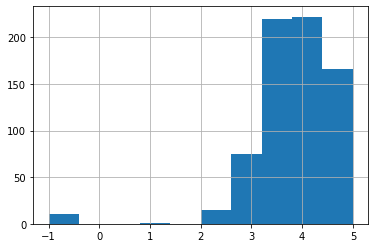

In [44]:
df.Rating.hist()

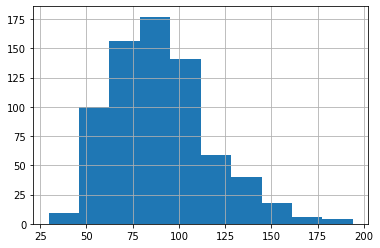

In [45]:
df.avg_salary.hist()

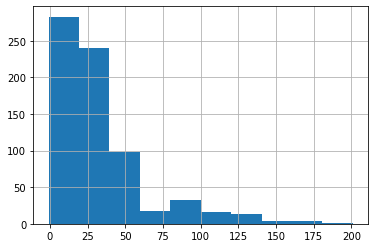

In [46]:
df.age.hist()

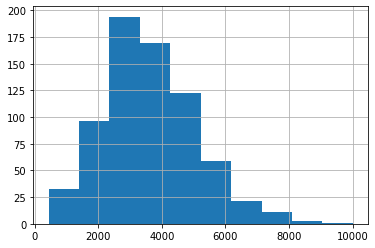

In [47]:
df.desc_len.hist()

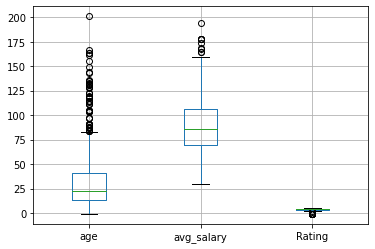

In [48]:
df.boxplot(column = ['age','avg_salary','Rating'])

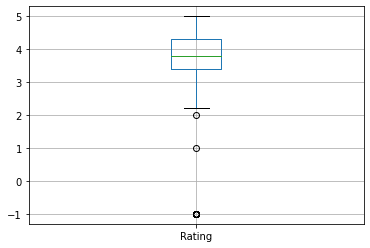

In [49]:
df.boxplot(column = 'Rating')

In [50]:
df[['age','avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,-0.069018,-0.106092,0.283274
avg_salary,-0.069018,1.000000,0.005173,0.128769
Rating,-0.106092,0.005173,1.000000,-0.008507
desc_len,0.283274,0.128769,-0.008507,1.000000


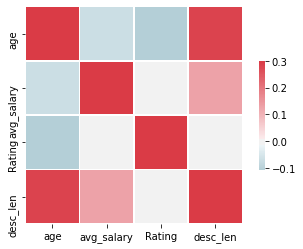

In [51]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [52]:
df_cat = df[['Location', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state','same_state', 'python', 'java',
       'r', 'spark', 'aws', 'excel', 'job_title_simple', 'seniority']]

Graph for Location: Total = 293


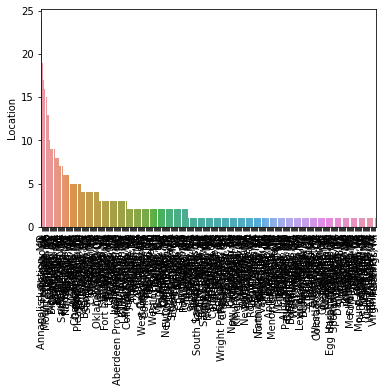

Graph for Size: Total = 8


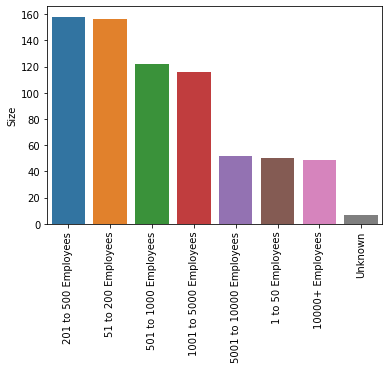

Graph for Type of ownership: Total = 9


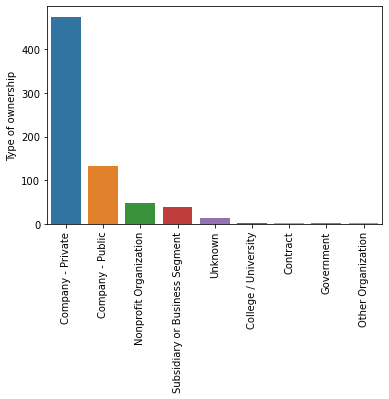

Graph for Industry: Total = 65


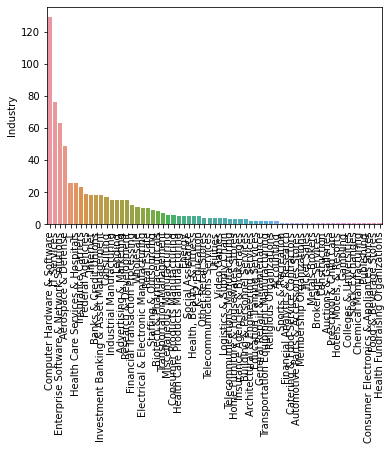

Graph for Sector: Total = 25


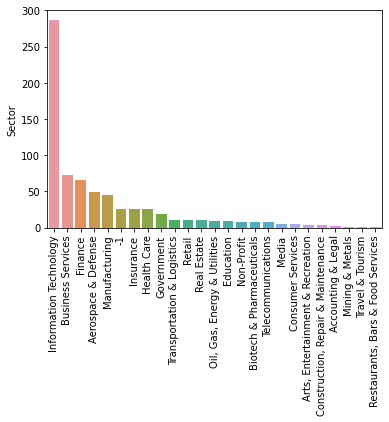

Graph for Revenue: Total = 13


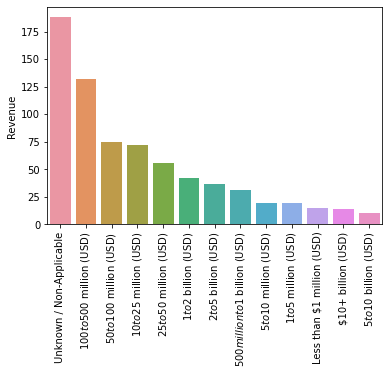

Graph for company_txt: Total = 455


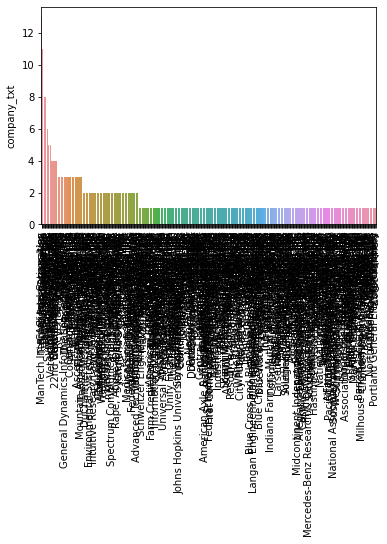

Graph for job_state: Total = 46


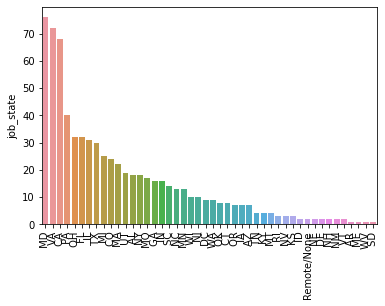

Graph for same_state: Total = 1


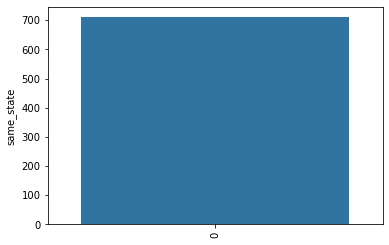

Graph for python: Total = 2


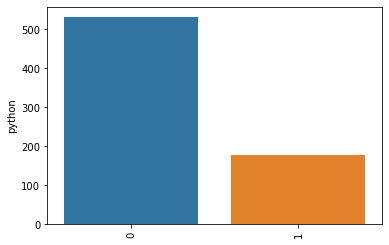

Graph for java: Total = 2


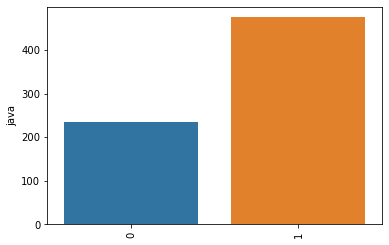

Graph for r: Total = 1


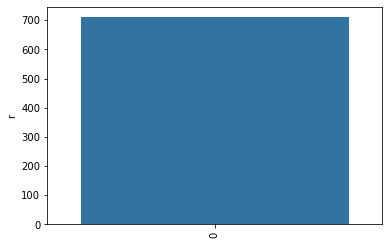

Graph for spark: Total = 2


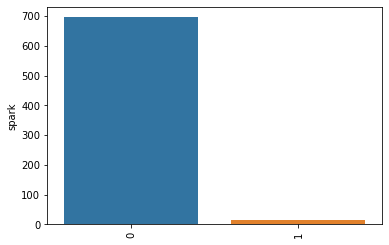

Graph for aws: Total = 2


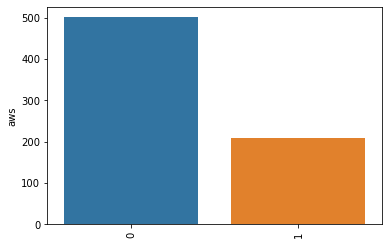

Graph for excel: Total = 2


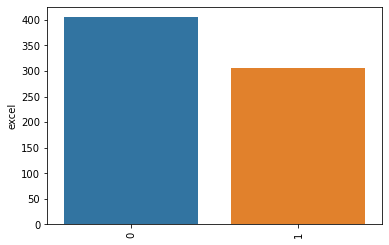

Graph for job_title_simple: Total = 6


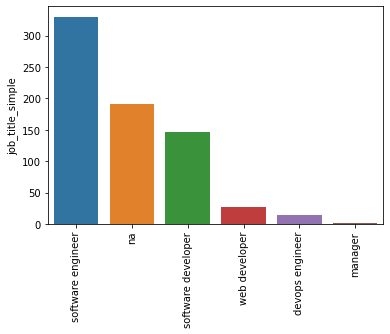

Graph for seniority: Total = 3


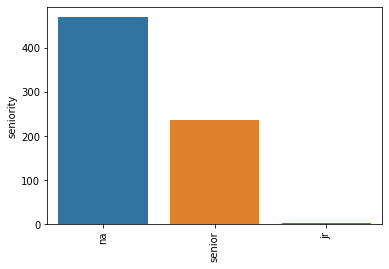

In [53]:

for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("Graph for %s: Total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Graph for Location: Total = 20


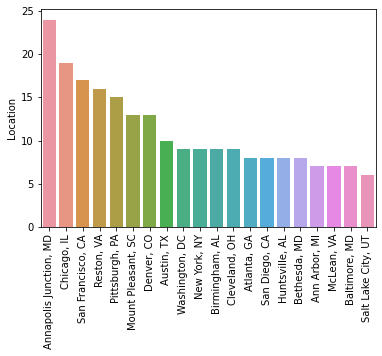

Graph for company_txt: Total = 20


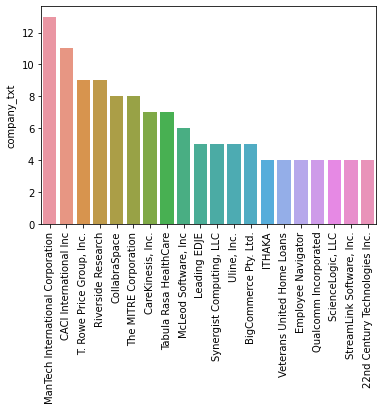

In [54]:

for i in df_cat[['Location','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("Graph for %s: Total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [55]:
pd.pivot_table(df, index = 'job_title_simple', values = 'avg_salary')

,avg_salary
job_title_simple,
devops engineer,102.866667
manager,128.500000
na,84.026178
software developer,84.147260
software engineer,95.213636
web developer,80.703704


In [56]:
pd.pivot_table(df, index = ['job_title_simple','seniority'], values = 'avg_salary')

avg_salary
job_title_simple   seniority            
devops engineer    na          96.250000
                   senior     129.333333
manager            na         128.500000
na                 na          78.895349
                   senior      94.701613
software developer jr          54.500000
                   na          77.476852
                   senior     105.805556
software engineer  jr          70.000000
                   na          82.060914
                   senior     115.034091
web developer      na          74.456522
                   senior     116.625000

In [57]:
pd.pivot_table(df, index = ['job_state'], values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
DE,125.000000
CA,113.558824
NH,108.250000
MD,104.644737
WA,103.277778
MA,103.204545
AZ,101.214286
CO,100.854167
VA,99.375000


In [58]:
pd.pivot_table(df, index = ['job_state','job_title_simple'], values = 'avg_salary').sort_values('job_state', ascending = False)

avg_salary
job_state   job_title_simple              
Remote/None software engineer   109.500000
            na                   65.000000
 WV         software engineer    80.000000
 WI         software engineer   100.625000
            software developer   74.250000
...                                    ...
 AZ         na                   87.000000
 AR         software engineer    75.000000
 AL         software engineer    86.928571
            software developer   74.666667
            na                   62.200000

[139 rows x 1 columns]

In [59]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [60]:
pd.pivot_table(df, index = ['job_state','job_title_simple'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state   job_title_simple              
Remote/None software engineer            1
            na                           1
 WV         software engineer            1
 WI         software engineer            4
            software developer           4
            na                           2
 WA         software developer           1
            na                           1
            software engineer            7
 VT         software developer           1
            na                           1
 VA         web developer                7
            software engineer           18
            software developer          27
            na                          19
            devops engineer              1
 UT         software developer           1
            na                           5
            web developer                1
            software engineer           12
 TX         web developer                1
            software engineer           10
            software developer           8
            na                          11
 TN         software developer           2
            na                           2
 SD         na                           1
 SC         software engineer           13
            na                           1
 RI         web developer                1
            software engineer            1
            na                           1
 PA         software developer           8
            devops engineer              2
            na                           9
            software engineer           19
            web developer                2
 OR         software engineer            3
            software developer           1
            na                           3
 OK         web developer                1
            software engineer            3
            software developer           1
            na                           2
            devops engineer              1
 OH         web developer                2
            software engineer           11
            software developer          11
            na                           7
            devops engineer              1
 NY         na                           6
            software engineer           12
 NV         software engineer            2
            software developer           1
 NM         na                           2
 NJ         software engineer            4
            software developer           3
            na                           3
 NH         software engineer            1
            manager                      1
 NE         software engineer            1
            software developer           1
 NC         software engineer            6
            software developer           1
            na                           6
 MT         na                           3
            software developer           1
 MO         software developer           2
            software engineer           10
            na                           5
 MN         software engineer            5
            software developer           6
            na                           2
 MI         software engineer           13
            software developer           6
            na                           6
 ME         software developer           1
 MD         software developer          13
            devops engineer              2
            na                          18
            software engineer           40
            web developer                3
 MA         software engineer           14
            software developer           3
            na                           2
            devops engineer              3
 KY         software developer           1
            na                           2
            web developer                1
 KS         software engineer            1
            na                           2
 IN         web developer        

In [61]:
pd.pivot_table(df[df.job_title_simple == 'software developer'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
CA,115.000000
CO,109.000000
VA,104.611111
NJ,102.833333
NC,101.500000
MA,98.333333
ME,95.500000
IL,89.500000
MD,88.307692


In [62]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided', 'python', 'java', 'r', 'spark', 'aws', 'excel', 'Type of ownership', 'avg_salary']]

In [63]:
for i in df_pivots.columns[:-1]:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
 5.0    106.242424
 2.7    100.566667
 4.2    100.462500
 2.6     97.300000
-1.0     96.818182
 2.2     96.250000
 2.8     94.083333
 3.6     94.017241
 2.4     93.916667
 4.9     92.200000
 3.2     92.196429
 3.4     90.735294
 4.1     90.142857
 3.5     90.055556
 4.0     88.446809
 3.3     88.340000
 3.9     87.838710
 3.8     86.652778
 3.1     86.540000
 4.3     86.250000
 4.8     86.136364
 4.5     85.312500
 3.0     85.076923
 4.4     84.184211
 4.6     83.647059
 3.7     81.743590
 4.7     78.911765
 2.9     73.545455
 2.5     71.000000
 2.0     69.500000
 2.3     65.000000
 1.0     58.500000
Industry
                                          avg_salary
Industry                                            
Hotels, Motels, & Resorts                 140.000000
Video Games                               126.125000
Health Fundraising Organizations          124.500000
Colleges & Universities                   119.500000
Investment Banking &

In [64]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python', values = 'avg_salary', aggfunc = 'count')

python,0,1
Revenue,,
$1 to $2 billion (USD),21,21
$1 to $5 million (USD),18,1
$10 to $25 million (USD),57,15
$10+ billion (USD),6,8
$100 to $500 million (USD),100,32
$2 to $5 billion (USD),27,10
$25 to $50 million (USD),42,14
$5 to $10 billion (USD),7,3
$5 to $10 million (USD),15,4


In [65]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

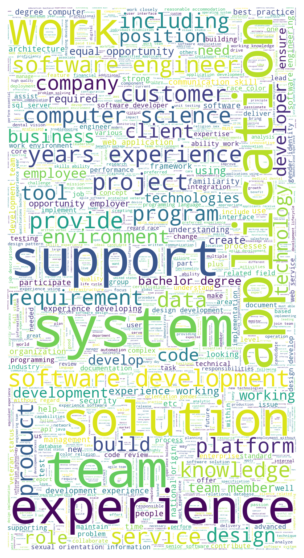

In [66]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [69]:
df_out = df

In [70]:
df_out.to_csv('eda_data.csv', index=False)